In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns 

In [33]:
df = pd.read_csv('../cleaned_data/final_df.csv')
pd.set_option('display.max_columns', None)


In [34]:
df

,Unnamed: 0,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,3392,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,1,3392,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
2,2,3392,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,4.0,6.27,4.0,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
3,3,3392,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,4.0,11.27,4.0,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
4,4,3392,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,8.0,4.0,9.27,4.0,1,809.98,27.262259,270.0,1,49.574949,62.430172,1,340.479212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79614,79614,37932,4,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,23.0,7.0,11.50,3.0,1,502.38,34.663572,378.0,1,35.104023,60.971333,0,479.866228,1
79615,79615,37932,5,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,18.0,7.0,11.50,3.0,1,502.38,40.565631,379.0,1,35.104023,54.185950,1,496.651610,1
79616,79616,37932,6,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,27.0,6.0,11.50,3.0,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083,1
79617,79617,37932,7,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,20.0,6.0,11.50,3.0,1,502.38,33.638208,381.0,1,35.104023,251.672582,3,319.164979,2


In [35]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)


In [38]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [40]:
# Make predictions on the test data
y_pred = rf.predict(X_test)


In [41]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3853
           1       0.80      0.86      0.83      7409
           2       0.85      0.82      0.83     12624

    accuracy                           0.82     23886
   macro avg       0.82      0.82      0.82     23886
weighted avg       0.83      0.82      0.82     23886



In [42]:
# So lets try to improve the accuracy by trying to balance the datasets 

In [43]:
df_copy = df.copy() 

In [44]:
df_copy['Credit_Score'].value_counts() 

Credit_Score
2    41808
1    24915
0    12896
Name: count, dtype: int64

In [45]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_copy[(df_copy['Credit_Score']==2)] 
df_minority = df_copy[(df_copy['Credit_Score']==1)] 
df_minority2 = df_copy[(df_copy['Credit_Score']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 41808, # to match majority class
                                 random_state=0)  # reproducible results
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,    # sample with replacement
                                 n_samples= 41808, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_minority_upsampled2, df_majority])

In [46]:
df_upsampled = df_upsampled.drop(df.columns[0], axis=1)

Credit_Score
1    41808
0    41808
2    41808
Name: count, dtype: int64

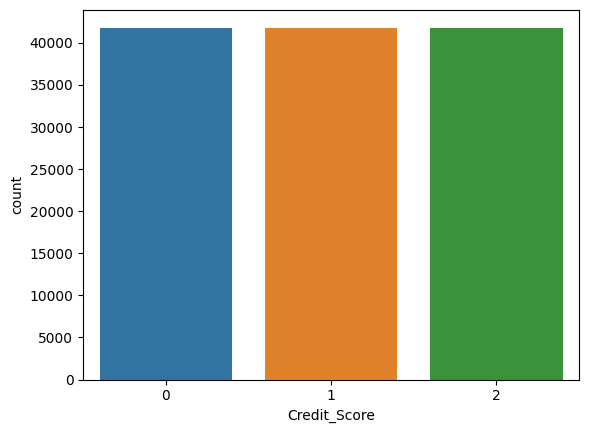

In [47]:
#Counting 1 and 0 Value in Response column
sns.countplot(x = 'Credit_Score', data = df_upsampled)
df_upsampled['Credit_Score'].value_counts()

In [48]:
df2= df_upsampled.copy()

In [49]:
X = df2.drop('Credit_Score', axis=1)
y = df2['Credit_Score']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [51]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)


In [52]:
rf.fit(X_train, y_train)




RandomForestClassifier(random_state=0)

In [54]:
# Make predictions on the test data
y_pred = rf.predict(X_test)


In [55]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12655
           1       0.88      0.96      0.92     12454
           2       0.93      0.79      0.86     12519

    accuracy                           0.91     37628
   macro avg       0.91      0.91      0.91     37628
weighted avg       0.91      0.91      0.91     37628



Hence we were able to increase the Accuracy of the Random Forest Classifier from 82% to 91% . Also the Overall classification report is also improved. 

In [56]:
# From the Hyperparamter tunining the best parameter was found 

In [57]:
best_param = {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}

In [58]:
best_model =  RandomForestClassifier(**best_param)

In [59]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, n_estimators=200)

In [60]:

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9131497820771766


In [61]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12655
           1       0.88      0.96      0.92     12454
           2       0.94      0.80      0.86     12519

    accuracy                           0.91     37628
   macro avg       0.91      0.91      0.91     37628
weighted avg       0.91      0.91      0.91     37628



In [63]:
import pickle

# Define the path and filename for the .pkl file
filename = '../models/rf_model.pkl'

# Open a file in binary mode and save the model using the pickle module
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)